In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as spy
from scipy.integrate import solve_ivp

/home/yamashita/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def AirResistance(v,r):#球体のみを考える
    dv = 1.81e-5#Pa*s
    density = 1.2#kg/m^3
    Re = density*abs(v)*2.0*r/dv
    if(Re < 1000):
        return 6*np.pi*dv*r*v
    else:
        return 1.0/2.0*0.47*density*(np.pi*r*r)*v*v

In [3]:
g = 9.80665#m/s^2
m = 0.614#kg
r = 0.76/np.pi/2.0#m
k = 0.7#反発係数
goal = 2.43
goalR = 0.45/2#m半径
TreePoint = 3.075+0.05

T = [0,5]

def fx(t,x):
    return [x[1],0-AirResistance(x[1],r)/m]

def fy(t,x):
    return [x[1],-g-AirResistance(x[1],r)/m]

def touchGround(t,x):
    return x[0]

def throughGoal(t,x):
    global TreePoint
    return x[0] - (int(TreePoint) + 2)

touchGround.terminal = True
throughGoal.terminal = True

Limit
 1413.296 ~ 1718.873 r/m
Limit
 62.452 ~ 77.349 dig
Edge 
 6.236275321151892 r/m
Edge 
 0.30401842190615475 dig
E 
 16.811 ~ 24.867 j


/tmp/ipykernel_1587/3348465019.py:94: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


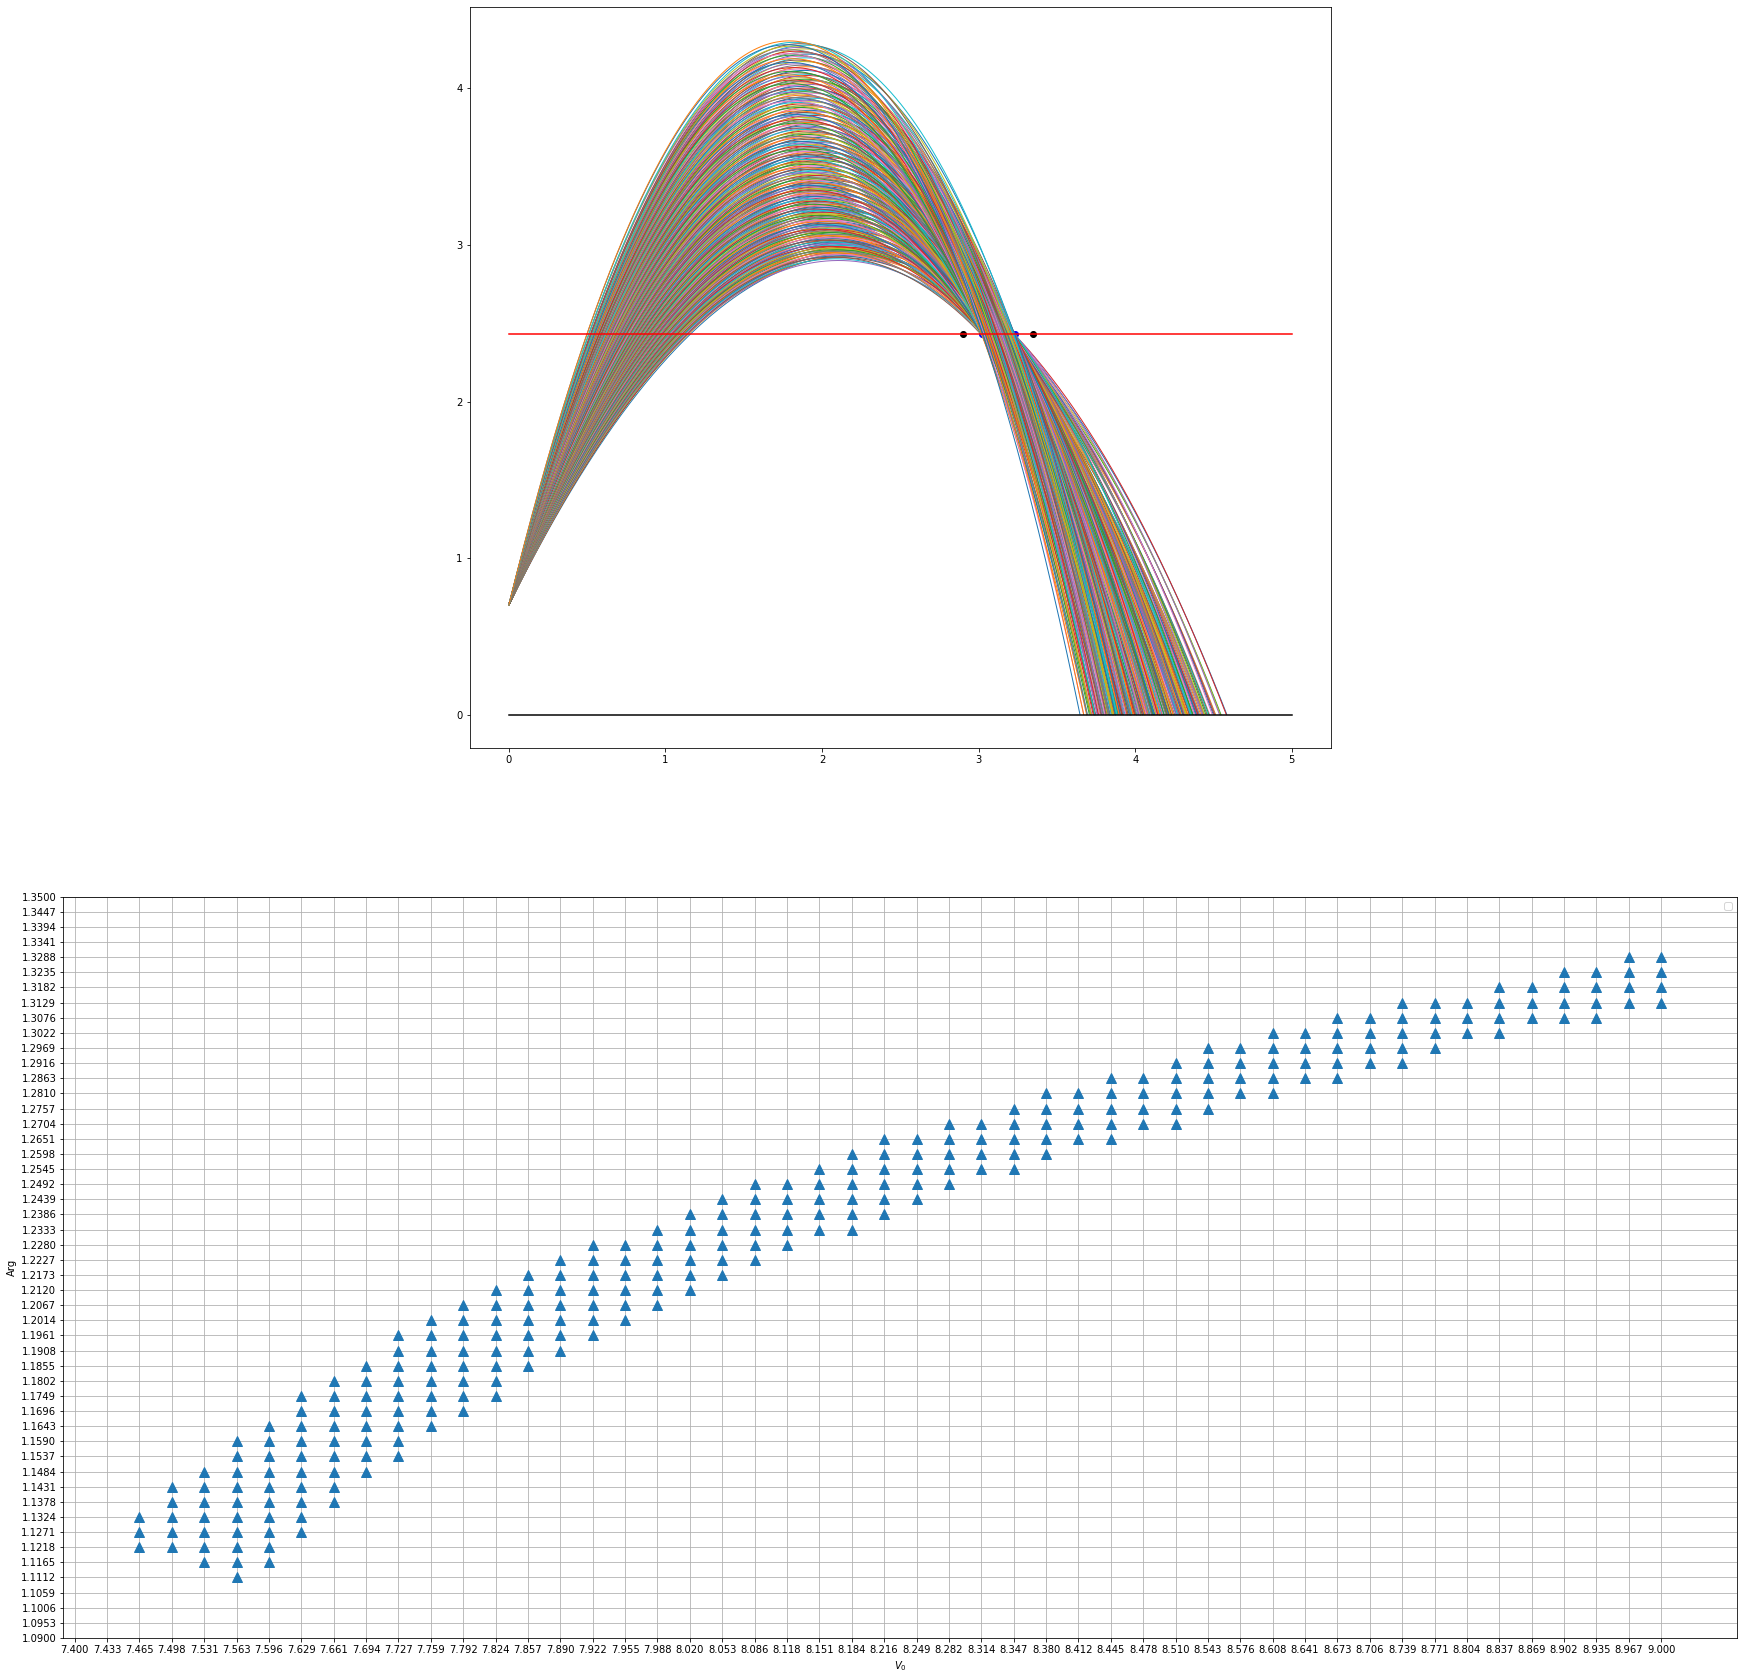

In [4]:
fig,[ax,ax1] = plt.subplots(2,figsize=[30,30])

ax.set(aspect=1)

max_ = 0

VAndArg = [[],[]]

t_eval=np.linspace(*T,10000)

def plotOrbit(h,v_0,arg):
    global max_,TreePoint,goal,goalR,r,VAndArg
    x_0 = [0,v_0*np.cos(arg)]
    y_0 = [h,v_0*np.sin(arg)]

    x = solve_ivp(fx,T,x_0,method='RK45',t_eval=t_eval,events=throughGoal).y
    t_eval_y = t_eval.copy()
    y = [[],[]]
    """
    while 0 < t_eval_y.shape[0]:
        y_ = solve_ivp(fy,T,y_0,method='RK45',t_eval=t_eval_y,events=touchGround)
        t_eval_y = t_eval_y[:-len(y_.t)]
        y_0 = [1e-30,-k*y_.y[1][-1]]
        y[0].extend(y_.y[0])
        y[1].extend(y_.y[1])
    """    
    y_ = solve_ivp(fy,T,y_0,method='RK45',t_eval=t_eval_y[:len(x[0])],events=touchGround)
    y[0].extend(y_.y[0])
    y[1].extend(y_.y[1])

    y = np.array(y)

    x = np.array(x)
    
    if((y[0][(goal-0.01 < y[0]) & (y[0] < goal+0.01)]).shape[0] == 0):
        return
    
    e = 0.01

    x_ = x[0][:y.shape[1]]
    x_ = x_[(goal-e < y[0]) & (y[0] < goal+e) & (TreePoint-goalR+r < x_) & (x_ < TreePoint+goalR-r)]
    if(x_.shape[0] == 0):
        return
    y_ = y[0]
    y_ = y_[(goal-e < y[0]) & (y[0] < goal+e) & (TreePoint-goalR+r < x[0][:y.shape[1]]) & (x[0][:y.shape[1]] < TreePoint+goalR-r)]
    
    if(np.arctan2((y_[-1]-y_[0]),(x_[-1]-x_[0])) < -np.pi/2 or -np.pi/4 < np.arctan2((y_[-1]-y_[0]),(x_[-1]-x_[0]))):
        return

    if(max_ < x[0,-1]):
        max_ = x[0,-1]

    VAndArg[0].append(v_0)
    VAndArg[1].append(arg)

    ax.plot(x[0,:y.shape[1]],y[0,:],label="$v_0$:{:.2f} $arg$:{:.2f}".format(v_0,180*arg/np.pi),lw=1)

h = 0.7

V = [7.4,9]

Arg = [1.09,1.35]

paturnV = 50
paturnArg = 50

edge = 0.1

for arg in np.linspace(*Arg,paturnArg):
    for v_0 in np.linspace(*V,paturnV):
        plotOrbit(h,v_0,arg)

ax.plot([0,max_],[goal,goal],c='r')
ax.plot([0,max_],[0,0],c='k')
ax.scatter(TreePoint+goalR,goal,c='k')
ax.scatter(TreePoint-goalR,goal,c='k')
ax.scatter(TreePoint+goalR-r,goal,c='b')
ax.scatter(TreePoint-goalR+r,goal,c='b')

wheelSize = 0.1 #直径#1
gearRate = 1

ax1.plot(VAndArg[0],VAndArg[1],lw=0,marker='^',markersize=10)

ax1.set(ylabel='Arg',xlabel=r'$V_0$',xticks=np.linspace(*V,paturnV),yticks=np.linspace(*Arg,paturnArg))

print("Limit\n {:.3f} ~ {:.3f} r/m".format(gearRate*V[0]/(np.pi*wheelSize)*60,gearRate*V[1]/(np.pi*wheelSize)*60))
print("Limit\n {:.3f} ~ {:.3f} dig".format(180*Arg[0]/np.pi,180*Arg[1]/np.pi))
print("Edge \n {} r/m".format(gearRate*(np.linspace(*V,paturnV)[1]-np.linspace(*V,paturnV)[0])/(np.pi*wheelSize)*60))
print("Edge \n {} dig".format(180*(np.linspace(*Arg,paturnArg)[1]-np.linspace(*Arg,paturnArg)[0])/np.pi))
print("E \n {:.3f} ~ {:.3f} j".format(0.5*m*V[0]**2,0.5*m*V[1]**2))

plt.grid()
plt.legend()
plt.show()